In [6]:
import pandas as pd

# Cargar el archivo CSV que guardaste
df = pd.read_csv('dataset_final.csv')

# Verifica su contenido
print(df.head())

    WEEK         ITEM_CODE  TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
0  34-22  7501058792808BP2             0.006              0.139   
1  34-22     7501058715883             0.487            116.519   
2  34-22     7702626213774             1.391             68.453   
3  34-22     7501058716422             0.022              1.481   
4  34-22     7501058784353             2.037            182.839   

   TOTAL_UNIT_AVG_WEEKLY_SALES              REGION MANUFACTURER   BRAND  \
0                        1.000  TOTAL AUTOS AREA 5      RECKITT  VANISH   
1                        2.916  TOTAL AUTOS AREA 5      RECKITT  VANISH   
2                        5.171  TOTAL AUTOS AREA 5      RECKITT  VANISH   
3                        1.833  TOTAL AUTOS AREA 5      RECKITT  VANISH   
4                        5.375  TOTAL AUTOS AREA 5      RECKITT  VANISH   

               ITEM                                   ITEM_DESCRIPTION  \
0  7501058792808BP2  VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...  

In [8]:
print(df.columns)

Index(['WEEK', 'ITEM_CODE', 'TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES',
       'TOTAL_UNIT_AVG_WEEKLY_SALES', 'REGION', 'MANUFACTURER', 'BRAND',
       'ITEM', 'ITEM_DESCRIPTION', 'CATEGORY', 'FORMAT', 'ATTR1', 'ATTR2',
       'ATTR3', 'SEGMENT', 'WEEK_NUM', 'YEAR', 'UNIT_PRICE'],
      dtype='object')


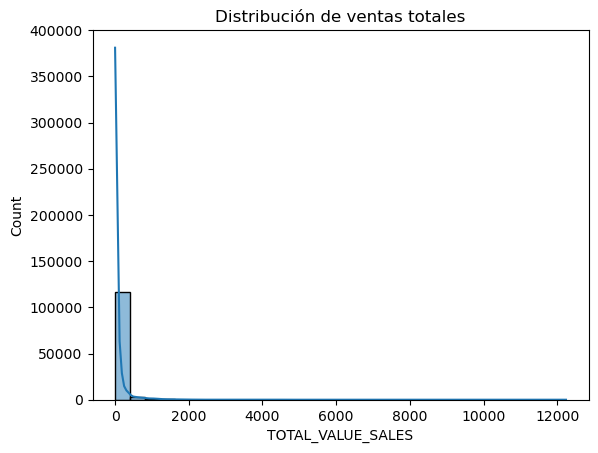

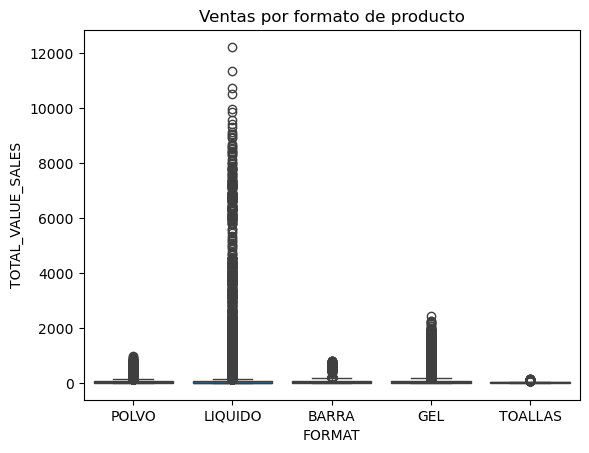

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
sns.histplot(data=df, x='TOTAL_VALUE_SALES', bins=30, kde=True)
plt.title('Distribución de ventas totales')
plt.savefig('hist_total_value.png')
plt.show()

# Boxplot por formato
sns.boxplot(data=df, x='FORMAT', y='TOTAL_VALUE_SALES')
plt.title('Ventas por formato de producto')
plt.savefig('box_format_sales.png')
plt.show()

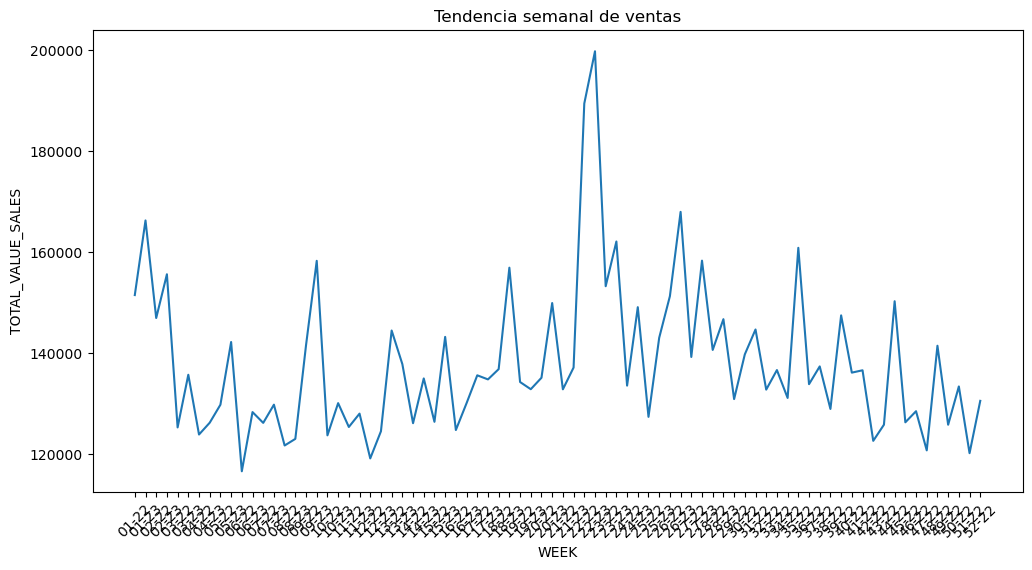

In [13]:
df['WEEK'] = df['WEEK'].astype(str)  # si aún no está como texto
weekly_sales = df.groupby('WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x='WEEK', y='TOTAL_VALUE_SALES')
plt.title('Tendencia semanal de ventas')
plt.xticks(rotation=45)
plt.savefig('trend_weekly_sales.png')
plt.show()

In [15]:
filtered = df[df['REGION'] == 'TOTAL AUTOS AREA 5']
trend = filtered.groupby('WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()

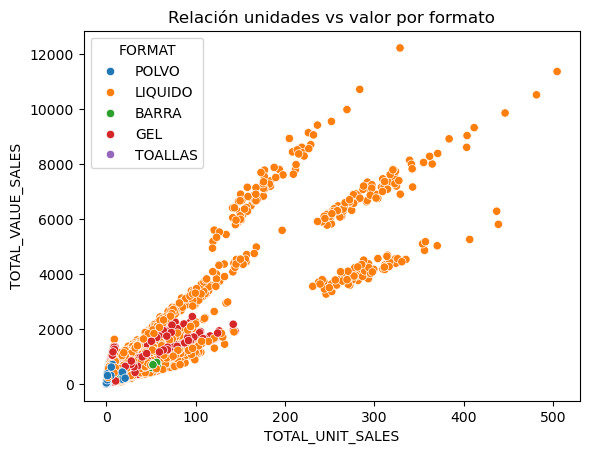

In [17]:
sns.scatterplot(data=df, x='TOTAL_UNIT_SALES', y='TOTAL_VALUE_SALES', hue='FORMAT')
plt.title('Relación unidades vs valor por formato')
plt.savefig('scatter_units_value.png')
plt.show()

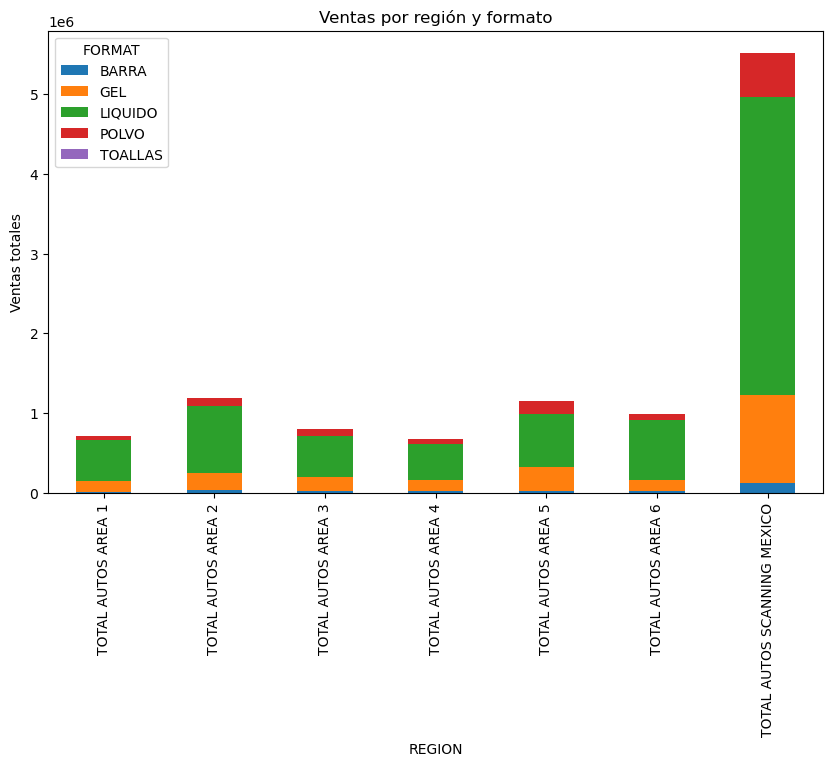

In [19]:
region_sales = df.groupby(['REGION', 'FORMAT'])['TOTAL_VALUE_SALES'].sum().unstack().fillna(0)

region_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Ventas por región y formato')
plt.ylabel('Ventas totales')
plt.savefig('stacked_region_format.png')
plt.show()